### Sameer Singh<br>AST 390 Problem Set 5

Woah! Can I have some brownie points for predicting this homework assignment back in my Homework 3 submission? 😆

> By looking at the graphs (individually), and finding the distance between peaks, we find a period $T \approx 
6.3~\mathrm{s}$ for $\theta_0 = 10^{\circ}$, in good agreement with the small-angle period, and $T \approx 7.75~\mathrm{s}$  for $\theta_0 = 100^{\circ}$, which has markedly departed from the small-angle period. I give some "zoomed in" examples below, showing that these values do indeed correspond to the peak spacings. If we wanted to do better than we could do visually, **we might take a Fourier transform of the data**.

Anyway, what we want to do is recreate solution for the evolution, by integrating the system for one period (we'll just use the small-angle value, $T = 2\pi$, for simplicity). This will result in a series of points in the time-domain that we’ll call $\theta_n$. We will then compute the Fourier transform of $\theta(t)$,  $\Theta_k = \mathcal{F}(\theta_n)$ using $\mathtt{numpy.fft.rfft}$. Next, we'll plot $|\Theta_k|$
 vs $\nu_k$, where $\nu_k$ is the frequency. Then we'll rinse and repeat, this time integrating for ten periods. 
 
 
I want to avoid cluttering this notebook, so I'm not going to include the ODE code here. Instead, I'm going to package the RK4 solver in particular in a separate module, $\mathtt{pendulumrk4.py}$, and call it as needed.

In [1]:
from pendulumrk4 import *

ω_0 = 0 # rad/s 
θ_0 = np.deg2rad(100)
state_0 = PendulumState(θ_0, ω_0)
T_run_1 = 2*np.pi
T_run_10 = 20*np.pi
tau_run = 0.01 
ts_1, his_1 = rk4_pendulum(state_0, tau_run, T_run_1)
θs_1 = [state.θ for state in his_1]
θs_1_deg = np.rad2deg(np.array(θs_1)) 
ts_10, his_10 = rk4_pendulum(state_0, tau_run, T_run_10)
θs_10 = [state.θ for state in his_10]
θs_10_deg = np.rad2deg(np.array(θs_10))

Let's just plot our results to make sure everything's working correctly.

In [2]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
fig.dpi = 1200
ax1.plot(ts_1, θs_1_deg)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel(r"$\theta$ ($^\circ$)")
ax1.set_title(r"$\theta$ vs. $t$ for $\approx 1$ period integration")
ax2.plot(ts_10, θs_10_deg)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel(r"$\theta$ ($^\circ$)")
ax2.set_title(r"$\theta$ vs. $t$ for $\approx 10$ period integration")

Text(0.5, 1.0, '$\\theta$ vs. $t$ for $\\approx 10$ period integration')

(0.0, 850.0)

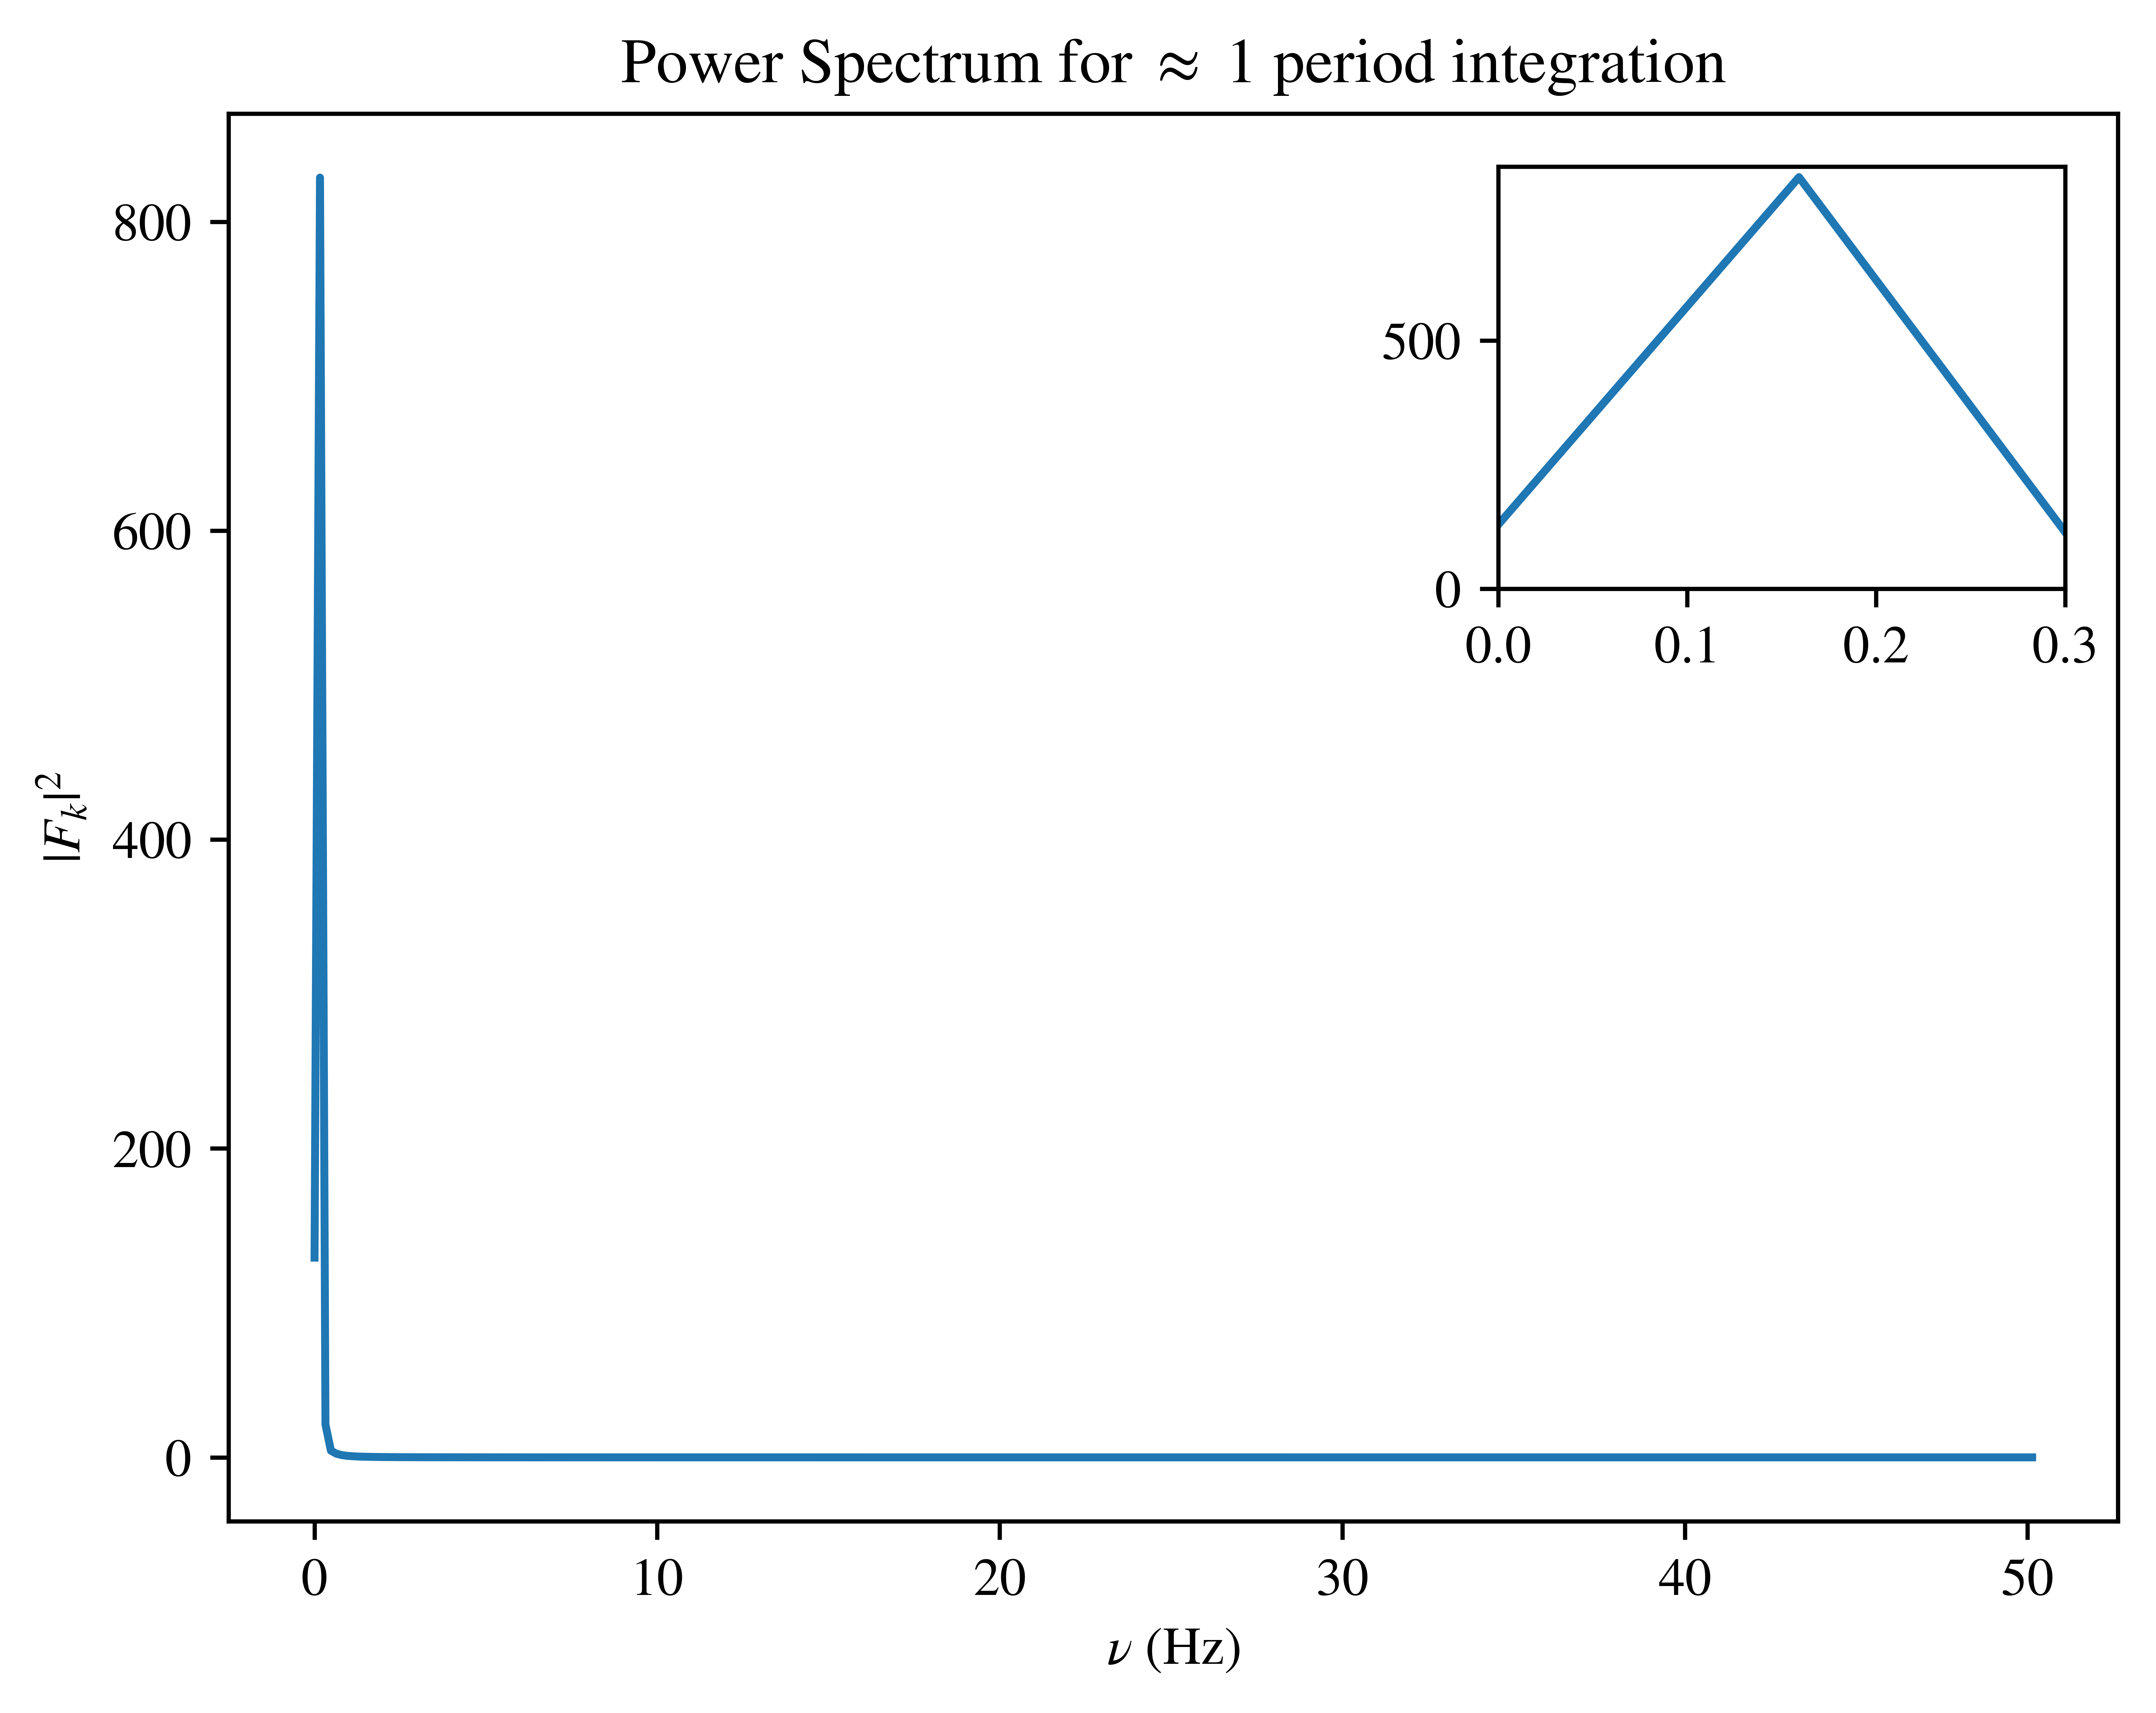

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# package to easily make insets -- we want to zoom in on the region of interest in our graphs

F_1 = np.fft.rfft(θs_1) # take the FFT
kfreq1 = np.fft.rfftfreq(len(θs_1)) * len(θs_1) / T_run_1 # get physical freqs corresponding to Fourier coeffs
fig, ax = plt.subplots() # plot the power spectrum; normalize by 2/N
fig.dpi = 1200
ax.set_xlabel(r"$\nu$ (Hz)")
ax.set_ylabel("$|F_k|^2$")
ax.set_title(r"Power Spectrum for $\approx$ 1 period integration")
ax.plot(kfreq1, np.abs(F_1)**2 * 2 / len(θs_1))

axinset = inset_axes(ax, width="30%", height="30%", loc="upper right", borderpad = 1)
axinset.plot(kfreq1, np.abs(F_1)**2 * 2 / len(θs_1))
axinset.set_xlim(0, 0.3) 
axinset.set_ylim(0, 850) 

After zooming in a bunch, we determine that the peak power is at $\nu = 0.159155 ~\mathrm{Hz}$. This corresponds to a period of $T = 1/\nu = 6.28318~\mathrm{s}$. That is $2\pi$, which is the small angle period. Why is this happening, if $\theta_0 = 100^{\circ}$ certainly isn't a small angle? Well, since we only integrated over a single small-angle period, we only got a very narrow view into the periodicity (remember, this is discrete information), and the dominant contribution from the small angle period washed out other "harmonics."

(0.0, 10000.0)

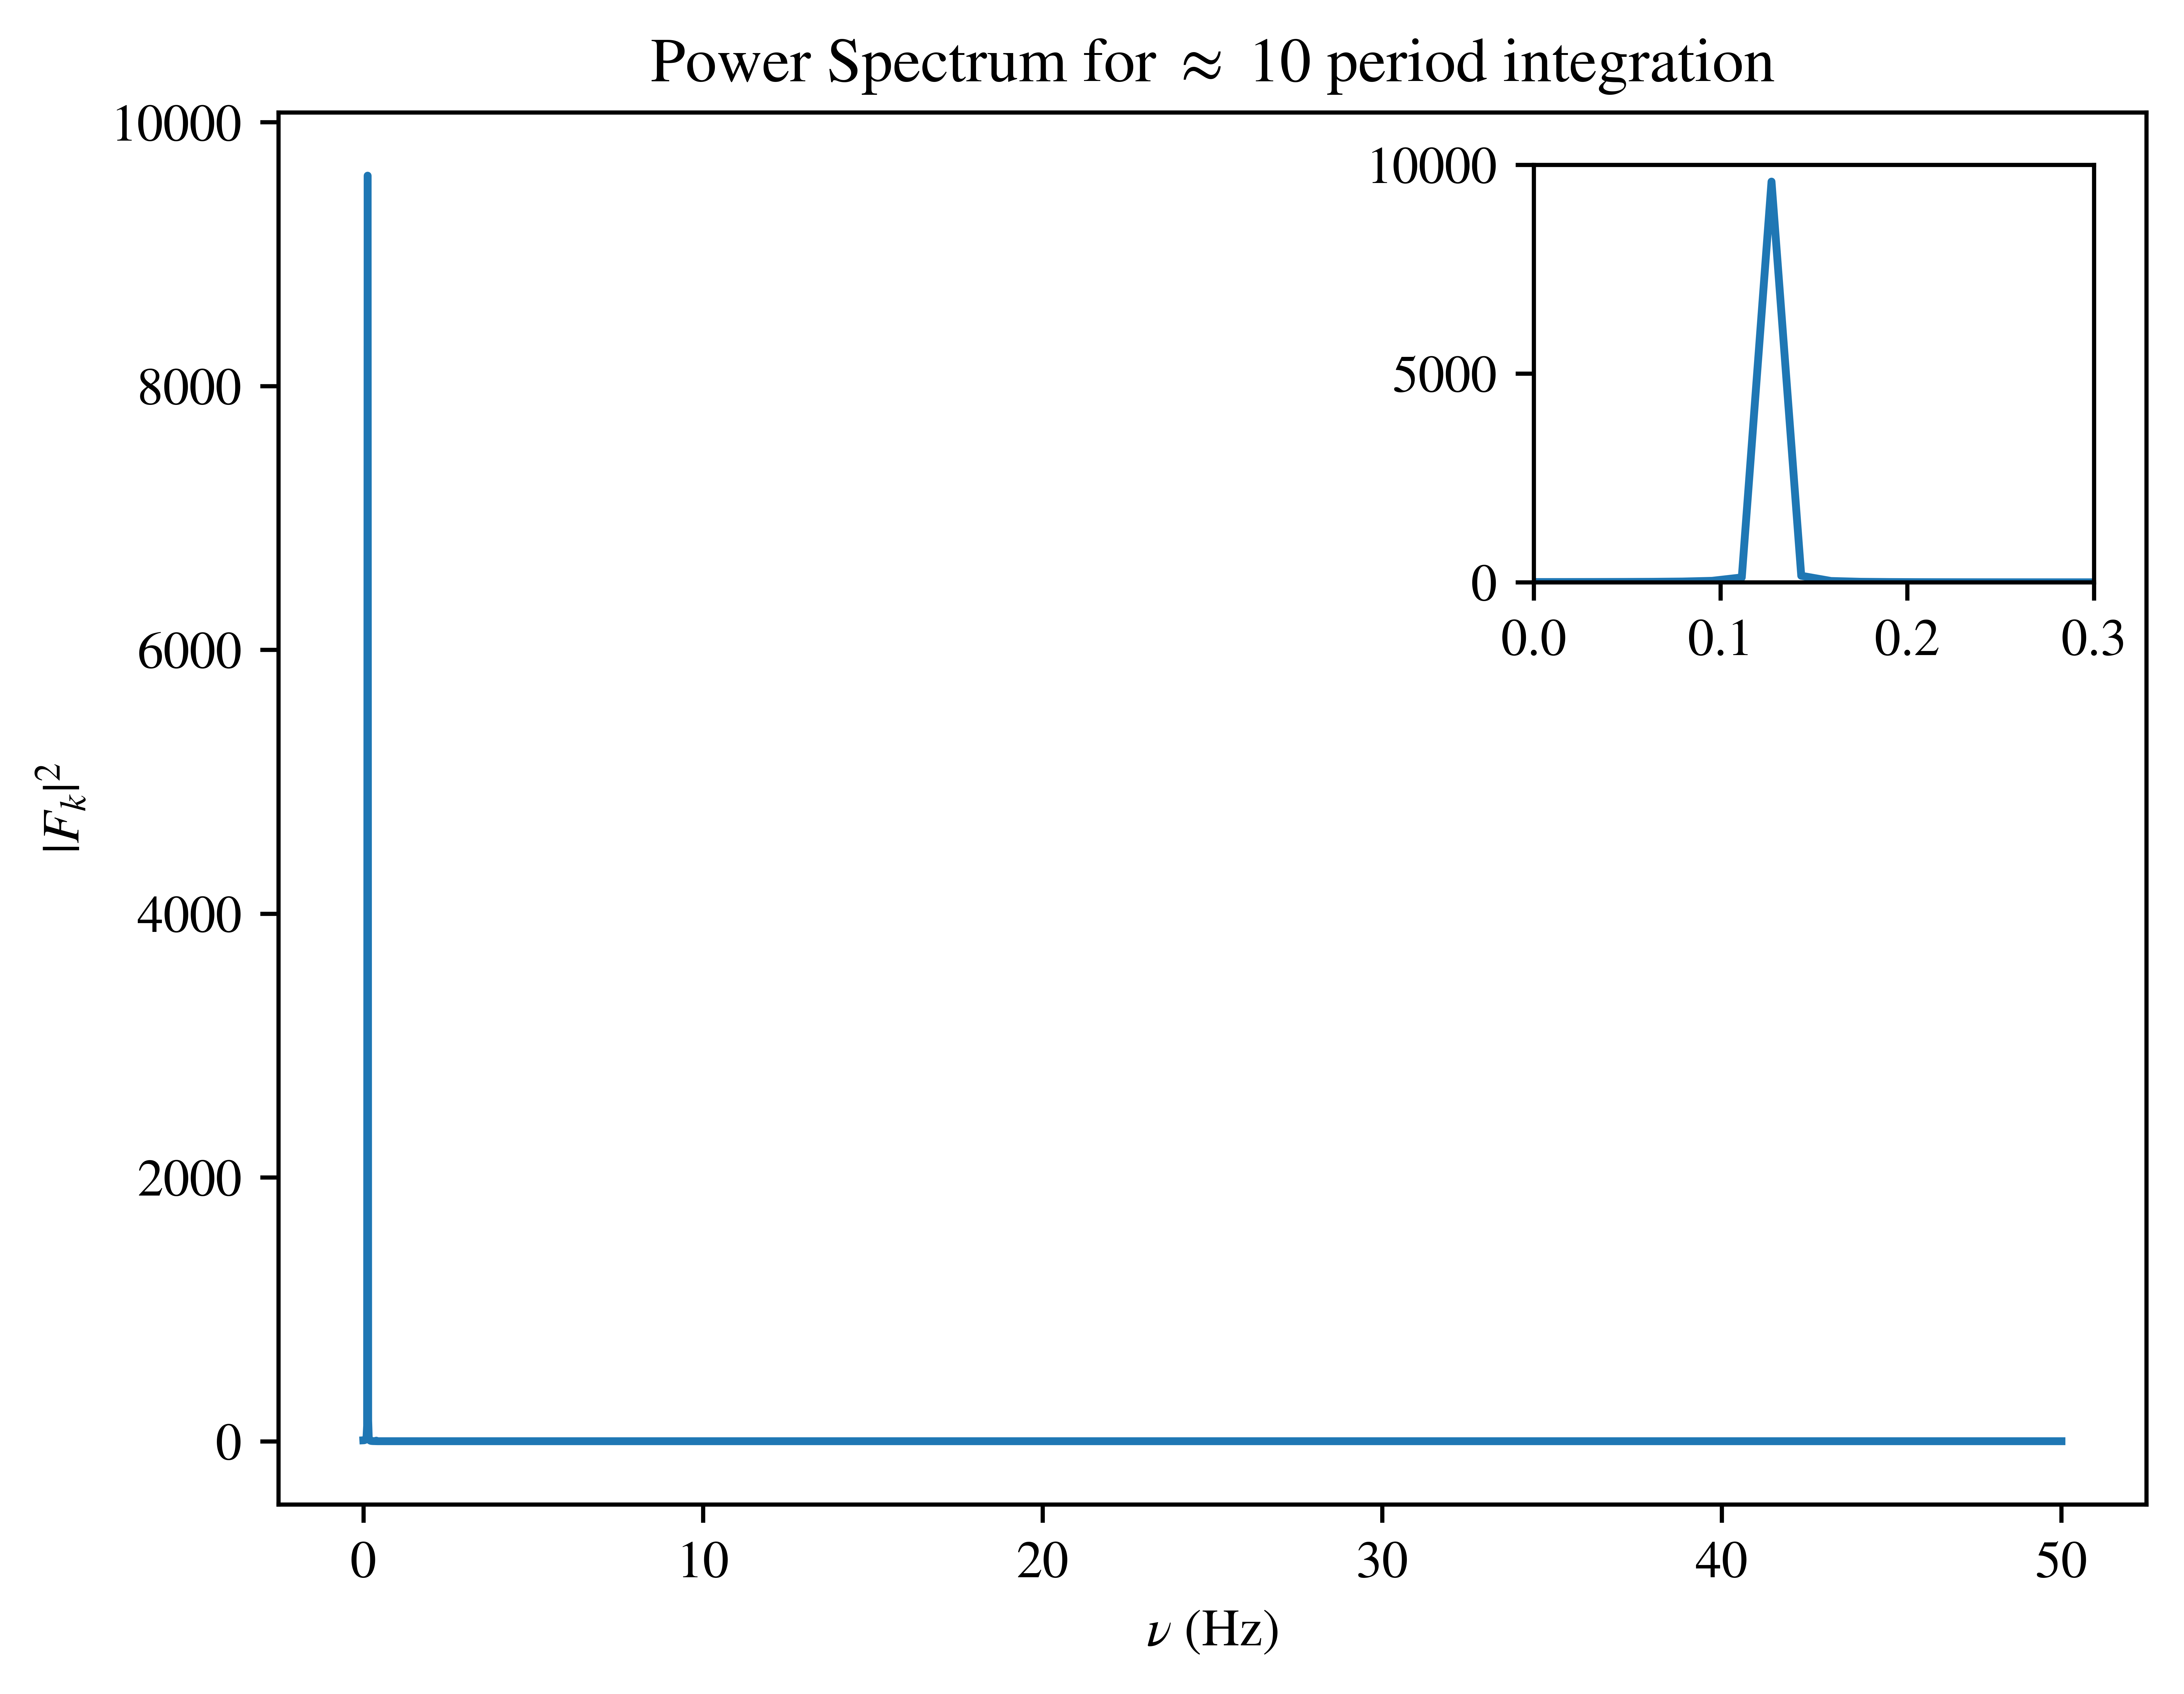

In [4]:
F_10 = np.fft.rfft(θs_10)
kfreq10 = np.fft.rfftfreq(len(θs_10)) * len(θs_10) / T_run_10
fig, ax = plt.subplots()
fig.dpi = 1200
ax.set_xlabel(r"$\nu$ (Hz)")
ax.set_ylabel("$|F_k|^2$")
ax.set_title(r"Power Spectrum for $\approx$ 10 period integration")
ax.plot(kfreq10, np.abs(F_10)**2 * 2 / len(θs_10))

axinset = inset_axes(ax, width="30%", height="30%", loc="upper right", borderpad = 1)
axinset.plot(kfreq10, np.abs(F_10)**2 * 2 / len(θs_10))
axinset.set_xlim(0, 0.3) 
axinset.set_ylim(0, 10000) 

After zooming in a bunch, we determine that the peak power is at $\nu = 0.127325~\mathrm{Hz}$. This corresponds to a period of $T = 1/\nu = 7.85392~\mathrm{s}$. That's better: I evaluated the power series solution to the elpitic integral out to tenth order and got a period of $7.74153~\mathrm{s}$, so the agreement is quite good. We have more periods than before, so we can get a better answer than before, i.e. a higher, narrower, more powerful peak.